In [2]:
def auxget_filenames(path, ext, filter=''):
    ''' Collects all filenames from specified path with a specificed extension
    
    Input:
    path: path to find all filenames (relative or absolute)
    ext: extension (including ".")'''
 
    filenames = [os.path.join(path, filename) for filename in os.listdir(path) if os.path.isfile(os.path.join(path, filename)) and filename.endswith(ext) and filter in filename] 
        
    return filenames



In [73]:
%load_ext autoreload
%autoreload 2

#import nafuma.auxillary as aux
import os

#from matplotlib import pyplot as plt
import pandas as pd
#filenames= aux.get_filenames("C:/Users\halvorhv/OneDrive - Universitetet i Oslo/1_OrderPaper/analysis/raman/202209-Raman-LNMO/annealed/txt",)
#print(filenames)

#FIXME subtract the background from the max-values
#FIXME consider using some of the smaller peaks --> might be even more sensitive from point to point
#FIXME instead of taking just the top point, consider taking couple of the top points and refine where the maximum will be.
#FIXME make sure the correct peak is chosen, maybe narrow down region especially for second peak 
#FIXME Also monitor the wavenumber and compare how this varies from sample to sample. Clear difference between Mn15-ord and Mn155/16/disord

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reference maxord- and disord (9-8Q) samples
### Makig a dataframe with all the data

In [67]:
paths_maxord= auxget_filenames("C:/Users\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/maxord",'txt')
paths_disord= auxget_filenames("C:/Users\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/9-8Q",'txt')
paths = paths_disord
for maxord  in paths_maxord:
    paths.append(maxord)
#paths = paths_maxord
print(paths)
#import pandas as pd

filenames=[]
df_ref=pd.DataFrame()
stoichiometry_list=[]
type_list=[]
atmosphere_list=[]
for i, path in enumerate(paths):
    df=pd.read_csv(path,delim_whitespace=True)
    filename_full=os.path.basename(path)
    stoichiometry=filename_full.split('-')[0]
    stoichiometry_list.append(stoichiometry)
    if "8Q" in filename_full:
        type = "disord"
    else:
        type=filename_full.split('-')[1]
    type_list.append(type)
    filename=str(stoichiometry)+'_'+str(type)
    filenames.append(filename)
    if i == 0:
        df_ref["Wave"]=df["#Wave"]
    df_ref[filename]=df["#Intensity"]
print(filenames)


['C:/Users\\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/9-8Q\\Mn15-9-8Q-aq100_exp10s_x100_LP10.txt', 'C:/Users\\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/9-8Q\\Mn155-9-8Q-aq100_exp10s_x100_LP10.txt', 'C:/Users\\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/9-8Q\\Mn16-9-8Q-aq100_exp10s_x100_LP10.txt', 'C:/Users\\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/maxord\\Mn15-maxord-aq100_exp10s_x100_LP10.txt', 'C:/Users\\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/maxord\\Mn15-veryordered-aq100_exp10s_x100_LP10.txt', 'C:/Users\\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/maxord\\Mn155-maxord-aq100_exp10s_x100_LP10.txt', 'C:/Users\\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/maxord\\Mn155-veryordered-aq100_exp10s_x100_LP10.txt', 'C:/Users\\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/maxord\\Mn16-maxord-aq100_exp10

### Picking out max values

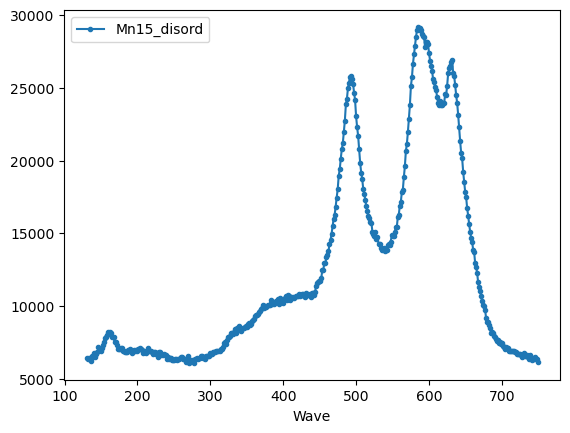

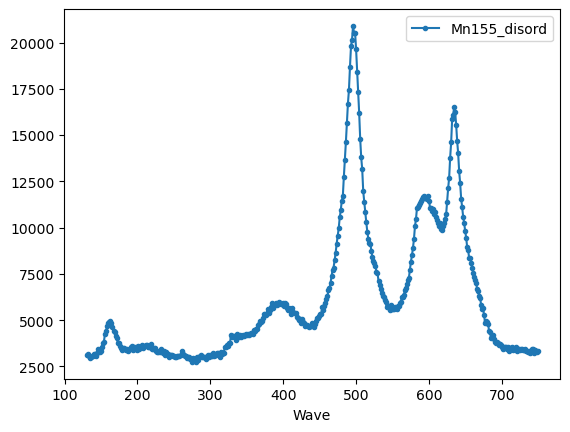

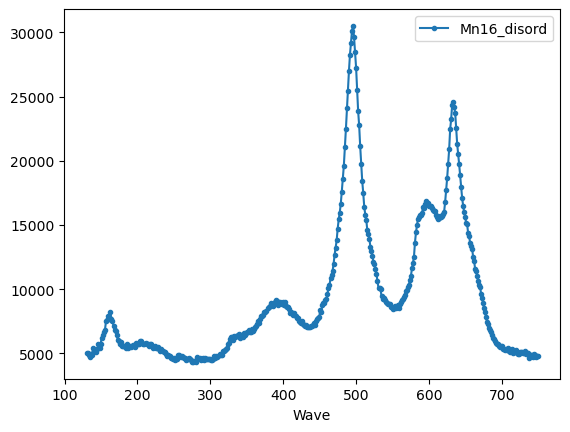

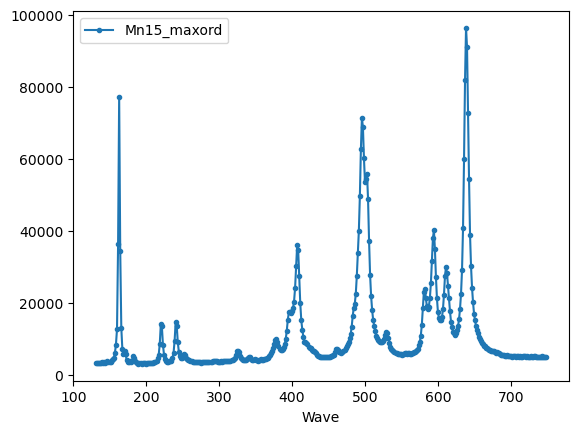

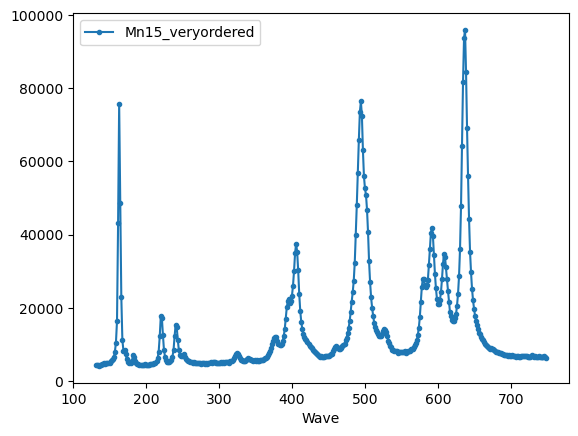

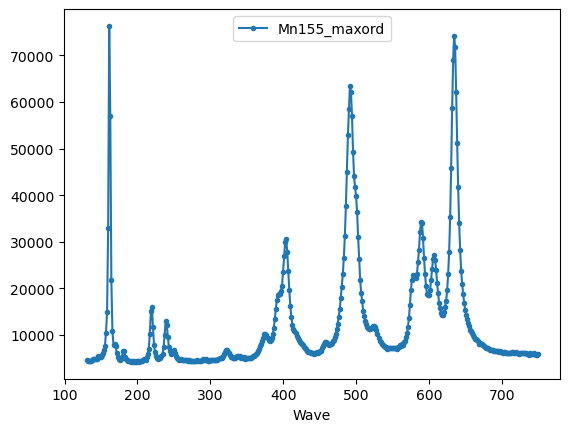

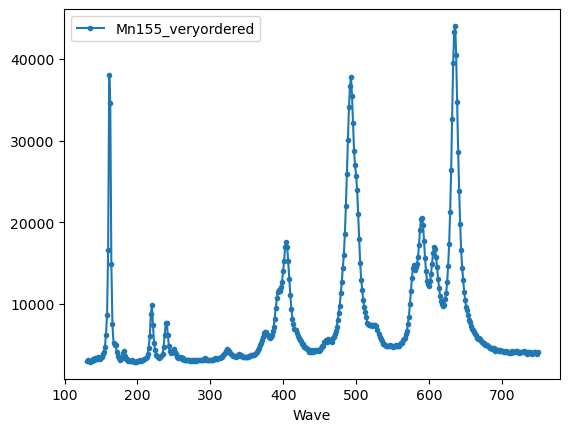

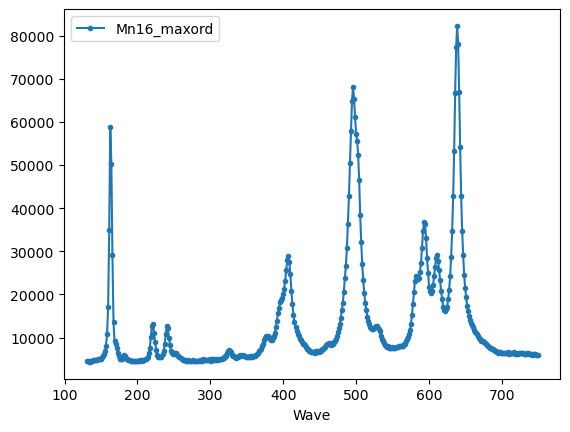

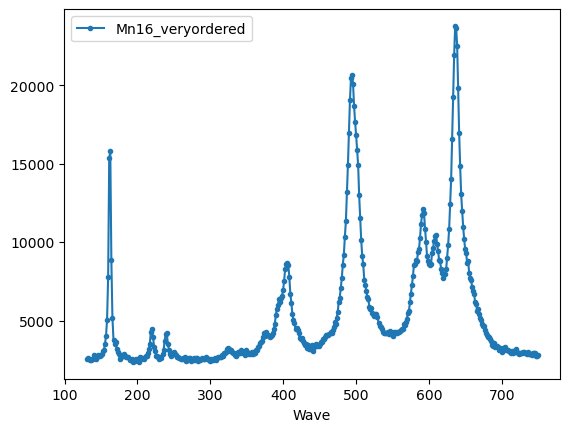

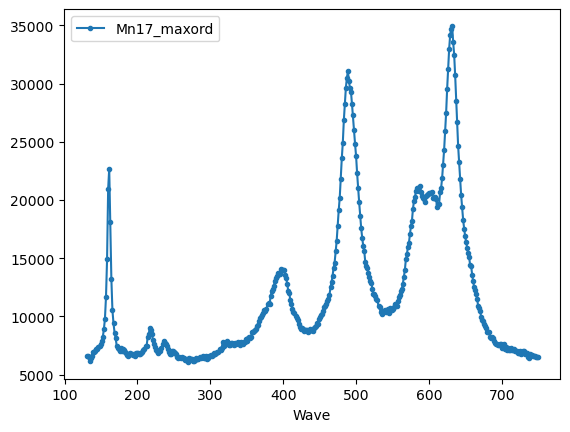

In [72]:
df_ref_zoom=df_ref.loc[df_ref["Wave"] < 750]
df_ref_plot=df_ref_zoom.loc[df_ref_zoom["Wave"] > 130]
df_ref_firstpeak=df_ref.loc[df_ref["Wave"] < 200]
df_ref_secondpeak=df_ref.loc[df_ref["Wave"] > 600]

#df_annealed_zoom=df_annealed_zoom.loc[df_annealed_zoom["Wave"] > 140]df_annealed["Wave"] < 750]
firstpeak_max_list=[]
secondpeak_max_list=[]

plotting = True

for file in filenames:
    if plotting:
        df_ref_plot.plot(x='Wave', y=file, marker='.')
    max_value_1=max(df_ref_firstpeak[file])
    firstpeak_max_list.append(max_value_1)
    max_value_2=max(df_ref_secondpeak[file])
    secondpeak_max_list.append(max_value_2)
    #temperature = file.split('_')[1]
    #temperature=temperature.replace('C','')
    #temp_list.append(temperature)
    

### Make dataframe and plot 

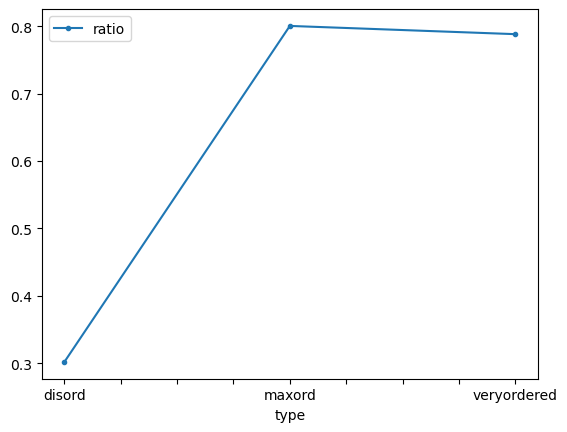

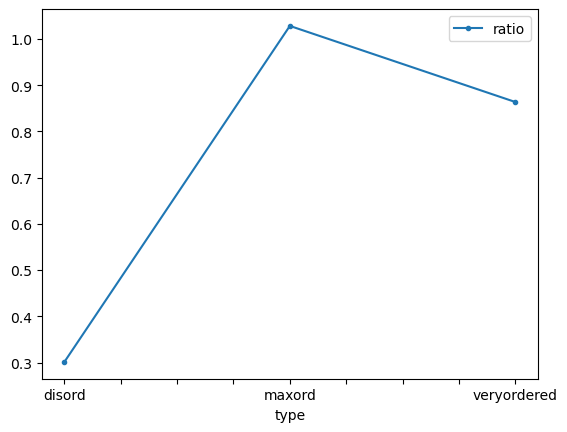

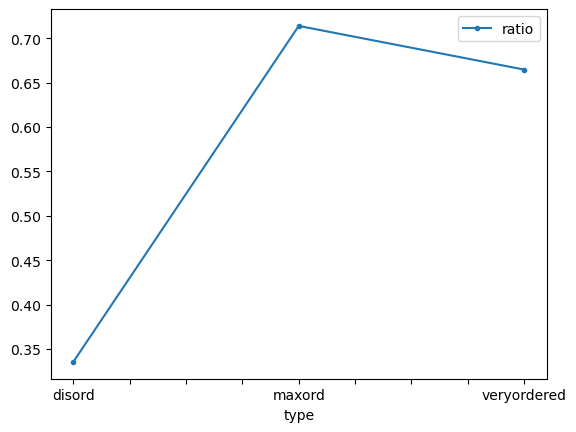

In [71]:
df_ref_results=pd.DataFrame()
df_ref_results["stoich"]=stoichiometry_list
df_ref_results["type"]=type_list
#df_ref_results["atmos"]=atmosphere_list
df_ref_results["max1"]=firstpeak_max_list
df_ref_results["max2"]=secondpeak_max_list
df_ref_results["ratio"]=df_ref_results["max1"]/df_ref_results["max2"]
#df_results
for stoich in ["Mn15","Mn155","Mn16"]:
    df_new=df_ref_results.loc[df_ref_results["stoich"] == stoich]
    df_new.plot(x="type",y="ratio", marker='.')

## 6 h annealed samples
### Making a dataframe with all data

In [51]:
paths= auxget_filenames("C:/Users\halvorhv/OneDriveUiO/1_OrderPaper/analysis/raman/202209-Raman-LNMO/annealed",'txt')
#print(filenames)
#import pandas as pd
filenames=[]
df_annealed=pd.DataFrame()
stoichiometry_list=[]
temp_list=[]
atmosphere_list=[]
for i, path in enumerate(paths):
    df=pd.read_csv(path,delim_whitespace=True)
    filename_full=os.path.basename(path)
    stoichiometry=filename_full.split('-')[0]
    stoichiometry_list.append(stoichiometry)
    if "O2" in filename_full:
        temp=filename_full.split('9-8Q-')[-1].split('-')[1]
        atmos="O2"
    else:
        temp=filename_full.split('9-8Q-')[-1].split('-')[0]
        atmos="air"
    atmosphere_list.append(atmos)
    temp_list.append(float(temp.replace('C','')))
    number=1
    if "-p" in filename_full:
        number=filename_full.split('-p')[-1]
        number=number[0]
    #if not "C" in temp:
    #    temp2=filename_full.split('-')[3]
    #    filename=str(stoichiometry)+'_'+str(temp2)+'_'+str(temp)
    #else:
    filename=str(stoichiometry)+'_'+str(temp)+'_'+str(number)
    filenames.append(filename)
    if i == 0:
        df_annealed["Wave"]=df["#Wave"]
    df_annealed[filename]=df["#Intensity"]
print(temp_list)

[525.0, 525.0, 550.0, 550.0, 575.0, 575.0, 600.0, 625.0, 650.0, 675.0, 700.0, 713.0, 725.0, 700.0, 725.0, 400.0, 450.0, 525.0, 575.0, 625.0, 625.0, 700.0, 400.0, 525.0, 575.0, 625.0, 625.0, 650.0, 675.0, 700.0]


### Picking out maximum values in the interesting regions (and possibly plotting)

In [56]:
df_annealed_zoom=df_annealed.loc[df_annealed["Wave"] < 750]
df_annealed_plot=df_annealed_zoom.loc[df_annealed_zoom["Wave"] > 130]
df_annealed_firstpeak=df_annealed.loc[df_annealed["Wave"] < 200]
df_annealed_secondpeak=df_annealed.loc[df_annealed["Wave"] > 600]

#df_annealed_zoom=df_annealed_zoom.loc[df_annealed_zoom["Wave"] > 140]df_annealed["Wave"] < 750]
firstpeak_max_list=[]
secondpeak_max_list=[]

plotting = False

for file in filenames:
    if plotting:
        df_annealed_plot.plot(x='Wave', y=file, marker='.')
    max_value_1=max(df_annealed_firstpeak[file])
    firstpeak_max_list.append(max_value_1)
    max_value_2=max(df_annealed_secondpeak[file])
    secondpeak_max_list.append(max_value_2)
    #temperature = file.split('_')[1]
    #temperature=temperature.replace('C','')
    #temp_list.append(temperature)
    

### Making a dataframe with all results, plotting the comparisons

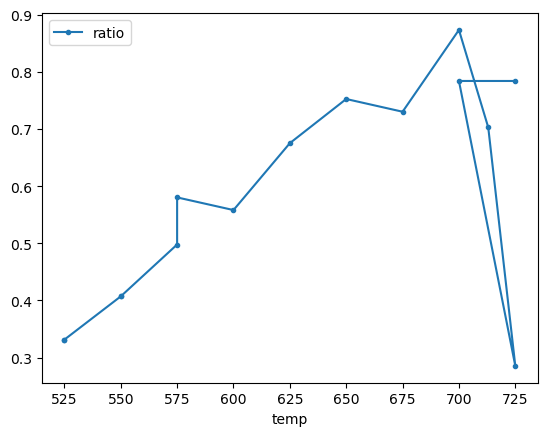

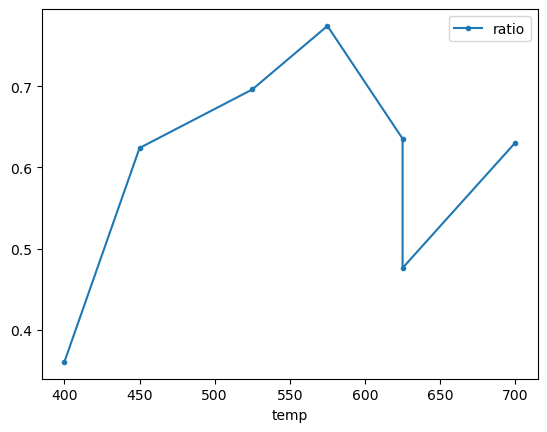

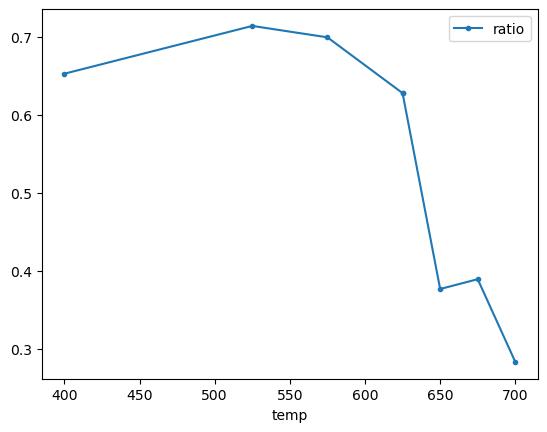

In [52]:
df_results=pd.DataFrame()
df_results["stoich"]=stoichiometry_list
df_results["temp"]=temp_list
df_results["atmos"]=atmosphere_list
df_results["max1"]=firstpeak_max_list
df_results["max2"]=secondpeak_max_list
df_results["ratio"]=df_results["max1"]/df_results["max2"]
#df_results
for stoich in ["Mn15","Mn155","Mn16"]:
    df_new=df_results.loc[df_results["stoich"] == stoich]
    df_new.plot(x="temp",y="ratio", marker='.')